###**Helper Functions Definition**

In [33]:
# Pie chart plotter function
def piechart_plotter(data, labels, title, figsize):
  
  fig, ax = plt.subplots(figsize=figsize, subplot_kw=dict(aspect="equal"))

  def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    if pct > 2:
      return "{:.1f}%\n({:d})".format(pct, absolute)
    else: 
      return ""

  wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                    textprops=dict(color="w"))

  ax.legend(wedges, labels,
            loc="center left",
            bbox_to_anchor=(1, 0, 0.5, 1))

  plt.setp(autotexts, size=8, weight="bold")

  ax.set_title(title)

  plt.show()

In [34]:
from wordcloud import WordCloud

def plot_wordcloud_from_tweets(preprocessed_tweets):
  text = " ".join(" ".join(tweet) for tweet in preprocessed_tweets)

  # Generate a word cloud image
  wordcloud = WordCloud(stopwords=[], colormap='winter', background_color="black").generate(text)

  # Display the generated image:
  # the matplotlib way:
  plt.figure(figsize=(10,8))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()


###**Package Importation and Data Acquisition**

In [35]:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import datetime as dt
import pickle

In [36]:
# Reading collected and extracted tweets file (using long covid keywords)
datapath = "../data/"
filename = "tweets_2022_04_12-08_34_59_AM.pkl"
with open(datapath + filename, "rb") as fp:
    b = pickle.load(fp)

In [8]:
# Checking the data fields, types and proportion of null values
df = pd.DataFrame.from_dict(b)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193555 entries, 0 to 193554
Data columns (total 38 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   _id                        193555 non-null  object 
 1   created_at                 193555 non-null  object 
 2   id                         193555 non-null  int64  
 3   id_str                     193555 non-null  object 
 4   text                       193555 non-null  object 
 5   display_text_range         26893 non-null   object 
 6   source                     193555 non-null  object 
 7   truncated                  193555 non-null  bool   
 8   in_reply_to_status_id      26131 non-null   float64
 9   in_reply_to_status_id_str  26131 non-null   object 
 10  in_reply_to_user_id        27317 non-null   float64
 11  in_reply_to_user_id_str    27317 non-null   object 
 12  in_reply_to_screen_name    27317 non-null   object 
 13  user                       19

In [9]:
# Checking some rows of the data 
df.head()

,_id,created_at,id,id_str,text,display_text_range,source,truncated,in_reply_to_status_id,in_reply_to_status_id_str,...,timestamp_ms,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status,quoted_status_permalink,extended_tweet,possibly_sensitive,extended_entities,withheld_in_countries
0,6239d164b6ba7a1ea378f96b,Tue Mar 22 13:38:39 +0000 2022,1506264091731668996,1506264091731668996,@l_ewig @LiberalMut Interessanter Vergleich. F...,"[20, 104]","<a href=""https://mobile.twitter.com"" rel=""nofo...",False,1.506263e+18,1506262799579766791,...,1647956319159,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6239d164b6ba7a1ea378f96c,Tue Mar 22 13:38:39 +0000 2022,1506264092062871556,1506264092062871556,RT @LeylaDAsadi: I'm a doctor. Here's why I'm ...,NaN,"<a href=""http://twitter.com/download/android"" ...",False,NaN,None,...,1647956319238,{'created_at': 'Mon Mar 21 18:52:38 +0000 2022...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6239d166b6ba7a1ea378f96d,Tue Mar 22 13:38:41 +0000 2022,1506264099692630021,1506264099692630021,RT @Tippotamus: ใครมาพูดว่าโควิดอะ ติดๆไปเหอะ ...,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,NaN,None,...,1647956321057,{'created_at': 'Sun Mar 20 04:36:31 +0000 2022...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6239d168b6ba7a1ea378f96e,Tue Mar 22 13:38:42 +0000 2022,1506264107275628552,1506264107275628552,RT @DrEricDing: Wow. Senator Kaine admits that...,NaN,"<a href=""http://twitter.com/download/android"" ...",False,NaN,None,...,1647956322865,{'created_at': 'Tue Mar 22 05:01:50 +0000 2022...,1.505814e+18,1505814009722798081,{'created_at': 'Mon Mar 21 07:50:11 +0000 2022...,"{'url': 'https://t.co/dFd7bWMSNN', 'expanded':...",NaN,NaN,NaN,NaN
4,6239d169b6ba7a1ea378f96f,Tue Mar 22 13:38:44 +0000 2022,1506264115282530311,1506264115282530311,RT @Tippotamus: ใครมาพูดว่าโควิดอะ ติดๆไปเหอะ ...,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,NaN,None,...,1647956324774,{'created_at': 'Sun Mar 20 04:36:31 +0000 2022...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### **Preliminary Preprocessing**



*   Reformatting some columns (user data, dates, tweets ...)
*   Extracting the sample on which the initial preprocessing will be performed

In [10]:
# Extracting the user dictionary column into a dataframe
users_df = pd.json_normalize(df.user)
users_df.rename(columns={"id": "user_id", "created_at":"user_created_at"}, inplace=True)
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193555 entries, 0 to 193554
Data columns (total 40 columns):
 #   Column                              Non-Null Count   Dtype 
---  ------                              --------------   ----- 
 0   user_id                             193555 non-null  int64 
 1   id_str                              193555 non-null  object
 2   name                                193555 non-null  object
 3   screen_name                         193555 non-null  object
 4   location                            117190 non-null  object
 5   url                                 44065 non-null   object
 6   description                         162479 non-null  object
 7   translator_type                     193555 non-null  object
 8   protected                           193555 non-null  bool  
 9   verified                            193555 non-null  bool  
 10  followers_count                     193555 non-null  int64 
 11  friends_count                       193

In [11]:
# Concatenating the user dataframe to the original one
users_df.dropna(axis=1, how='all', inplace=True)
df = pd.concat([df, users_df], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193555 entries, 0 to 193554
Data columns (total 72 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   _id                                 193555 non-null  object 
 1   created_at                          193555 non-null  object 
 2   id                                  193555 non-null  int64  
 3   id_str                              193555 non-null  object 
 4   text                                193555 non-null  object 
 5   display_text_range                  26893 non-null   object 
 6   source                              193555 non-null  object 
 7   truncated                           193555 non-null  bool   
 8   in_reply_to_status_id               26131 non-null   float64
 9   in_reply_to_status_id_str           26131 non-null   object 
 10  in_reply_to_user_id                 27317 non-null   float64
 11  in_reply_to_user_id_str   

In [12]:
# Creating a column containing full tweets (without Truncation)
df['full_tweet'] = df.apply(lambda x: x['extended_tweet']['full_text'] if type(x['extended_tweet'])==dict else x['text'], axis=1)
# Creating a column in the datetime format is YYYY-MM-DD for easier timeseries analysis
df['created_at_ymd'] =  pd.to_datetime(df['created_at']).dt.date
# Creating a column with any sort of geolocation information (extracted from the other columns: place or country)
df['loc'] = df.apply(lambda x: x['place']['country'] if x['place'] else x['location'], axis=1)
# Extracting the dataframe sample on which the initial preprocessing will be performed
sampled_df = df[['id', 'created_at', 'created_at_ymd', 'full_tweet', 'quote_count', 'reply_count', 'retweet_count', 'favorite_count', 'favorited', 'retweeted', 'lang', 'timestamp_ms', 'retweeted_status', 'user_id', 'name', 'screen_name', 'description', 'followers_count', 'user_created_at', 'loc']]

In [13]:
sampled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193555 entries, 0 to 193554
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                193555 non-null  int64 
 1   created_at        193555 non-null  object
 2   created_at_ymd    193555 non-null  object
 3   full_tweet        193555 non-null  object
 4   quote_count       193555 non-null  int64 
 5   reply_count       193555 non-null  int64 
 6   retweet_count     193555 non-null  int64 
 7   favorite_count    193555 non-null  int64 
 8   favorited         193555 non-null  bool  
 9   retweeted         193555 non-null  bool  
 10  lang              193555 non-null  object
 11  timestamp_ms      193555 non-null  object
 12  retweeted_status  139960 non-null  object
 13  user_id           193555 non-null  int64 
 14  name              193555 non-null  object
 15  screen_name       193555 non-null  object
 16  description       162479 non-null  obj

### **Initial Data Visualization**

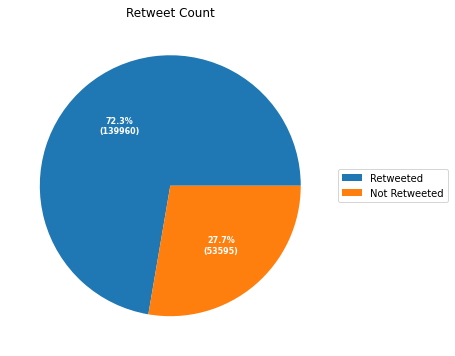

In [14]:
# Seperating retweeted and non retweeted tweets
sampled_retweet_df = sampled_df.dropna(subset=['retweeted_status'])
sampled_no_retweet_df = sampled_df[sampled_df[['retweeted_status']].isna().any(axis=1)]
# Plotting retweet percentage
data = [len(sampled_retweet_df), len(sampled_no_retweet_df)]
labels = ["Retweeted", "Not Retweeted"]

piechart_plotter(data, labels, title="Retweet Count", figsize=(8,6))

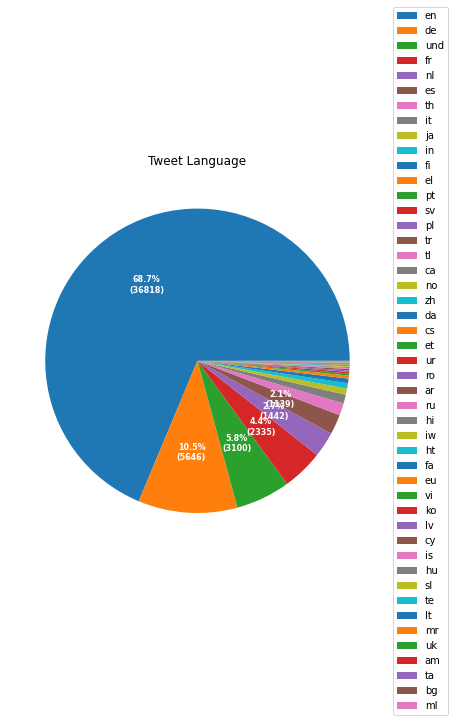

In [15]:
non_retweeted_lang_count = sampled_no_retweet_df['lang'].value_counts()
# Plotting tweet language proportion
data = non_retweeted_lang_count.to_list()
labels = non_retweeted_lang_count.index

piechart_plotter(data, labels, title="Tweet Language", figsize=(8,7))

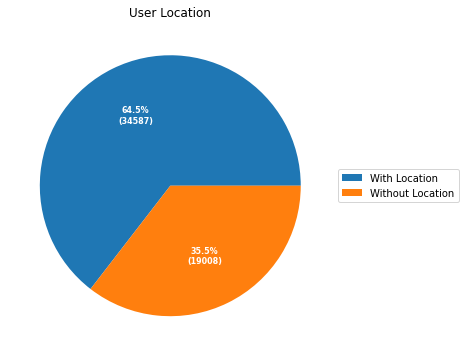

In [16]:
# Seperating tweets with a location and those without a location
sampled_no_retweet_loc_df = sampled_no_retweet_df.dropna(subset=['loc'])
sampled_no_retweet_no_loc_df = sampled_no_retweet_df[sampled_no_retweet_df[['loc']].isna().any(axis=1)]
# Plotting tweets with location proportion
data = [len(sampled_no_retweet_loc_df), len(sampled_no_retweet_no_loc_df)]
labels = ["With Location", "Without Location"]

piechart_plotter(data, labels, title="User Location", figsize=(8,6))

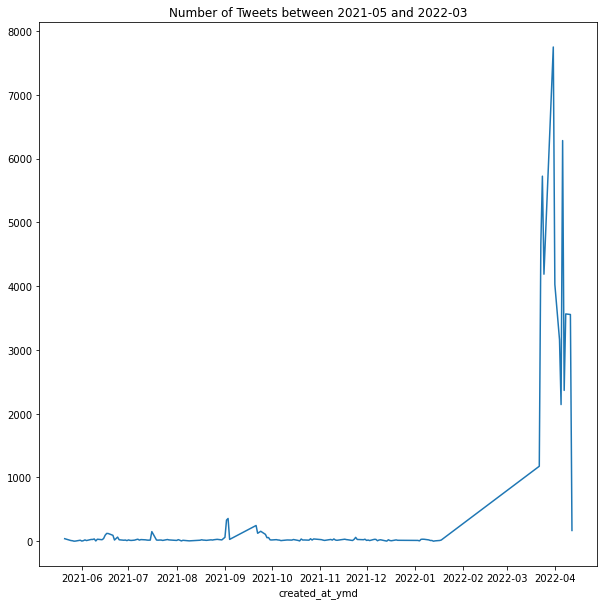

In [17]:
# Evolution of the number of tweets overtime
sampled_no_retweet_df.groupby(by = ['created_at_ymd']).count()['id'].plot(title="Number of Tweets between 2021-05 and 2022-03", figsize=(10,10))
plt.show()

In [18]:
# Assessing the number of tweets per user
tweets_per_user = sampled_no_retweet_df.groupby(by = ['user_id']).count()['full_tweet']
tweets_per_user.describe()

count    34979.000000
mean         1.532205
std          2.636878
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max        202.000000
Name: full_tweet, dtype: float64

In [19]:
# Top users with posts on long covid
sorted_tweets_per_user = tweets_per_user.sort_values(axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last', ignore_index=False, key=None)
sorted_tweets_per_user

user_id
1304036484920606720    202
1480071384600485889    149
301352485              103
1282997894463840256     97
3191893256              97
                      ... 
1062423344               1
1061974321               1
1061908434               1
1061646169               1
1513401310368120832      1
Name: full_tweet, Length: 34979, dtype: int64

### **Text Preprocessing and Discovery**

#### Installations and function definitions

In [20]:
!pip install contractions
!pip install word-forms
!pip install -U deep-translator

In [21]:
import re, string, unicodedata
import nltk
import contractions # expanding contractions
import inflect # natural language related tasks of generating plurals, singular nouns, etc.
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from nltk.tokenize import TweetTokenizer
import string


#nltk.download('punkt')
#nltk.download('stopwords')
#nltk.download('wordnet')

In [22]:
import nltk
#nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
nltk.download('omw-1.4')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\hayadi\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\hayadi\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [23]:
import sys
sys.path.append("../utils/preprocess")

In [24]:
from preprocess import Preprocess
prep = Preprocess()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hayadi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hayadi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hayadi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [25]:
#import re

#def multiple_replacer(*key_values):
#    replace_dict = dict(key_values)
#    replacement_function = lambda match: replace_dict[match.group(0)]
#    pattern = re.compile("|".join([re.escape(k) for k, v in key_values]), re.M)
#    return lambda string: pattern.sub(replacement_function, string)

#def multiple_replace(string, *key_values):
#    return multiple_replacer(*key_values)(string)

#replacements = (u"long covid", u"longcovid"), (u"covid long", u"longcovid"), (u"covidlong", u"longcovid"), (u"covid nineteen", u"covid"), (u"corona", u"covid"), (u"long term", u"longterm")

In [29]:
def preprocess_tweet(tweet):
    
    tweet = prep.replace_contractions(tweet)
    #tweet = prep.replace_special_words(tweet)
    tweet = prep.replace_hashtags_URL_USER(tweet, mode_URL="delete", mode_Mentions="delete", mode_Hashtag="replace")
    tweet = prep.tokenize(tweet)
    tweet = prep.remove_punctuation(tweet)
    tweet = prep.preprocess_emojis(tweet)
    tweet = prep.preprocess_emoticons(tweet)
    tweet = prep.remove_non_ascii(tweet)
    tweet = prep.to_lowercase(tweet)
    tweet = prep.replace_numbers(tweet)
    tweet = prep.remove_stopwords(tweet)
    tweet = prep.lemmatize_verbs(tweet)
    #tweet= multiple_replace(" ".join(tweet), *replacements)
    #tweet = prep.stem_words(tweet)
    
    return tweet

def preprocess_tweets(tweets):
    return [preprocess_tweet(tweet) for tweet in tweets if tweet]


In [30]:
from deep_translator import GoogleTranslator

def translate_tweets(tweets, target_language='en'):
    return [GoogleTranslator(source='auto', target=target_language).translate(tweet) for tweet in tweets]

#### English tweets discovery

In [31]:
preprocessed_tweets = preprocess_tweets(sampled_no_retweet_df[sampled_no_retweet_df['lang']=='en']['full_tweet'].to_list())

INFO: No category set for emoji ☣ -> delete emoji :biohazard:
INFO: No category set for emoji ✅ -> delete emoji :white_heavy_check_mark:
INFO: No category set for emoji 👉 -> delete emoji :backhand_index_pointing_right:
INFO: No category set for emoji 🙏 -> delete emoji :folded_hands:
INFO: No category set for emoji 👇 -> delete emoji :backhand_index_pointing_down:
INFO: No category set for emoji 👇 -> delete emoji :backhand_index_pointing_down:
INFO: No category set for emoji 👇 -> delete emoji :backhand_index_pointing_down:
INFO: No category set for emoji 🌷 -> delete emoji :tulip:
INFO: No category set for emoji 👇 -> delete emoji :backhand_index_pointing_down:
INFO: No category set for emoji ⬆ -> delete emoji :up_arrow:
INFO: No category set for emoji 🙈 -> delete emoji :see-no-evil_monkey:
INFO: No category set for emoji 🙊 -> delete emoji :speak-no-evil_monkey:
INFO: No category set for emoji 🙉 -> delete emoji :hear-no-evil_monkey:
INFO: No category set for emoji ▫ -> delete emoji :white_

INFO: No category set for emoji 😬 -> delete emoji :grimacing_face:
INFO: No category set for emoji 💀 -> delete emoji :skull:
INFO: No category set for emoji 🔥 -> delete emoji :fire:
INFO: No category set for emoji 🤡 -> delete emoji :clown_face:
INFO: No category set for emoji 👇 -> delete emoji :backhand_index_pointing_down:
INFO: No category set for emoji 🤔 -> delete emoji :thinking_face:
INFO: No category set for emoji 😑 -> delete emoji :expressionless_face:
INFO: No category set for emoji 💡 -> delete emoji :light_bulb:
INFO: No category set for emoji 💪 -> delete emoji :flexed_biceps:
INFO: No category set for emoji 💪 -> delete emoji :flexed_biceps:
INFO: No category set for emoji 🤔 -> delete emoji :thinking_face:
INFO: No category set for emoji 🙏 -> delete emoji :folded_hands:
INFO: No category set for emoji 👀 -> delete emoji :eyes:
INFO: No category set for emoji 🐋 -> delete emoji :whale:
INFO: No category set for emoji 🐋 -> delete emoji :whale:
INFO: No category set for emoji 🎤 -> 

INFO: No category set for emoji ⬇ -> delete emoji :down_arrow:
INFO: No category set for emoji 🏴 -> delete emoji :black_flag:
INFO: No category set for emoji 🤔 -> delete emoji :thinking_face:
INFO: No category set for emoji 👍 -> delete emoji :thumbs_up:
INFO: Could not replace emoticon: ;d of the word: ;d (<class 'KeyError'>, KeyError(';d'), <traceback object at 0x0000021F15FD3800>)
INFO: No category set for emoji 🙏 -> delete emoji :folded_hands:
INFO: No category set for emoji 👇 -> delete emoji :backhand_index_pointing_down:
INFO: No category set for emoji 🌟 -> delete emoji :glowing_star:
INFO: No category set for emoji 👉 -> delete emoji :backhand_index_pointing_right:
INFO: No category set for emoji 😬 -> delete emoji :grimacing_face:
INFO: No category set for emoji 🤞 -> delete emoji :crossed_fingers:
INFO: No category set for emoji ❌ -> delete emoji :cross_mark:
INFO: No category set for emoji ❌ -> delete emoji :cross_mark:
INFO: No category set for emoji ❌ -> delete emoji :cross_mar

INFO: No category set for emoji 🌚 -> delete emoji :new_moon_face:
INFO: No category set for emoji 👇 -> delete emoji :backhand_index_pointing_down:
INFO: No category set for emoji 💥 -> delete emoji :collision:
INFO: No category set for emoji 🙋 -> delete emoji :person_raising_hand:
INFO: No category set for emoji 🙏 -> delete emoji :folded_hands:
INFO: No category set for emoji ☢ -> delete emoji :radioactive:
INFO: No category set for emoji ☢ -> delete emoji :radioactive:
INFO: No category set for emoji 🔽 -> delete emoji :down_button:
INFO: No category set for emoji 😫 -> delete emoji :tired_face:
INFO: No category set for emoji ‼ -> delete emoji :double_exclamation_mark:
INFO: No category set for emoji 👍 -> delete emoji :thumbs_up:
INFO: No category set for emoji 🎧 -> delete emoji :headphone:
INFO: No category set for emoji 🚨 -> delete emoji :police_car_light:
INFO: No category set for emoji 👇 -> delete emoji :backhand_index_pointing_down:
INFO: No category set for emoji ▪ -> delete emoji

INFO: No category set for emoji 🙏 -> delete emoji :folded_hands:
INFO: No category set for emoji 🤔 -> delete emoji :thinking_face:
INFO: No category set for emoji 🔍 -> delete emoji :left-pointing_magnifying_glass:
INFO: No category set for emoji 👊 -> delete emoji :oncoming_fist:
INFO: No category set for emoji 💪 -> delete emoji :flexed_biceps:
INFO: No category set for emoji 🖕 -> delete emoji :middle_finger:
INFO: No category set for emoji 👍 -> delete emoji :thumbs_up:
INFO: No category set for emoji 🎉 -> delete emoji :party_popper:
INFO: No category set for emoji ⛔ -> delete emoji :no_entry:
INFO: No category set for emoji ⛔ -> delete emoji :no_entry:
INFO: No category set for emoji ⛔ -> delete emoji :no_entry:
INFO: No category set for emoji ➡ -> delete emoji :right_arrow:
INFO: No category set for emoji ⬇ -> delete emoji :down_arrow:
INFO: No category set for emoji ✅ -> delete emoji :white_heavy_check_mark:
INFO: No category set for emoji ✅ -> delete emoji :white_heavy_check_mark:
I

INFO: No category set for emoji ⬇ -> delete emoji :down_arrow:
INFO: No category set for emoji ⬇ -> delete emoji :down_arrow:
INFO: No category set for emoji 🗓 -> delete emoji :spiral_calendar:
INFO: No category set for emoji ⏰ -> delete emoji :alarm_clock:
INFO: No category set for emoji 🎓 -> delete emoji :graduation_cap:
INFO: No category set for emoji 🆓 -> delete emoji :FREE_button:
INFO: No category set for emoji 🤡 -> delete emoji :clown_face:
INFO: No category set for emoji 🌸 -> delete emoji :cherry_blossom:
INFO: No category set for emoji 🙏 -> delete emoji :folded_hands:
INFO: No category set for emoji 🌞 -> delete emoji :sun_with_face:
INFO: No category set for emoji 🌬 -> delete emoji :wind_face:
INFO: No category set for emoji 🚻 -> delete emoji :restroom:
INFO: No category set for emoji 👋 -> delete emoji :waving_hand:
INFO: No category set for emoji 🙋 -> delete emoji :person_raising_hand:
INFO: No category set for emoji 🤞 -> delete emoji :crossed_fingers:
INFO: No category set f

INFO: No category set for emoji 👇 -> delete emoji :backhand_index_pointing_down:
INFO: No category set for emoji 🙈 -> delete emoji :see-no-evil_monkey:
INFO: No category set for emoji 🙊 -> delete emoji :speak-no-evil_monkey:
INFO: No category set for emoji 🙉 -> delete emoji :hear-no-evil_monkey:
INFO: No category set for emoji ▫ -> delete emoji :white_small_square:
INFO: No category set for emoji ▫ -> delete emoji :white_small_square:
INFO: No category set for emoji 🔗 -> delete emoji :link:
INFO: No category set for emoji 👋 -> delete emoji :waving_hand:
INFO: No category set for emoji 👋 -> delete emoji :waving_hand:
INFO: No category set for emoji 👇 -> delete emoji :backhand_index_pointing_down:
INFO: No category set for emoji 😐 -> delete emoji :neutral_face:
INFO: No category set for emoji 👍 -> delete emoji :thumbs_up:
INFO: No category set for emoji 😐 -> delete emoji :neutral_face:
INFO: No category set for emoji 😴 -> delete emoji :sleeping_face:
INFO: No category set for emoji 💔 -> 

INFO: No category set for emoji 🐍 -> delete emoji :snake:
INFO: No category set for emoji 🔒 -> delete emoji :locked:
INFO: No category set for emoji 💔 -> delete emoji :broken_heart:
INFO: No category set for emoji 💔 -> delete emoji :broken_heart:
INFO: No category set for emoji 💔 -> delete emoji :broken_heart:
INFO: No category set for emoji ☠ -> delete emoji :skull_and_crossbones:
INFO: No category set for emoji 🗣 -> delete emoji :speaking_head:
INFO: No category set for emoji 🔗 -> delete emoji :link:
INFO: No category set for emoji 👇 -> delete emoji :backhand_index_pointing_down:
INFO: No category set for emoji 😅 -> delete emoji :smiling_face_with_open_mouth_&_cold_sweat:
INFO: No category set for emoji 🚨 -> delete emoji :police_car_light:
INFO: No category set for emoji 💯 -> delete emoji :hundred_points:
INFO: No category set for emoji 🗓 -> delete emoji :spiral_calendar:
INFO: No category set for emoji ⏰ -> delete emoji :alarm_clock:
INFO: No category set for emoji 🎓 -> delete emoji

INFO: No category set for emoji ➡ -> delete emoji :right_arrow:
INFO: No category set for emoji 🤧 -> delete emoji :sneezing_face:
INFO: No category set for emoji 🙏 -> delete emoji :folded_hands:
INFO: No category set for emoji 🙏 -> delete emoji :folded_hands:
INFO: No category set for emoji 💪 -> delete emoji :flexed_biceps:
INFO: No category set for emoji 🌱 -> delete emoji :seedling:
INFO: No category set for emoji 🌳 -> delete emoji :deciduous_tree:
INFO: No category set for emoji 😅 -> delete emoji :smiling_face_with_open_mouth_&_cold_sweat:
INFO: No category set for emoji 😝 -> delete emoji :face_with_stuck-out_tongue_&_closed_eyes:
INFO: No category set for emoji 🍆 -> delete emoji :eggplant:
INFO: No category set for emoji 🤔 -> delete emoji :thinking_face:
INFO: No category set for emoji 📃 -> delete emoji :page_with_curl:
INFO: No category set for emoji ⬇ -> delete emoji :down_arrow:
INFO: No category set for emoji 🚨 -> delete emoji :police_car_light:
INFO: No category set for emoji 🚨

INFO: No category set for emoji 🤦 -> delete emoji :person_facepalming:
INFO: No category set for emoji 🤦 -> delete emoji :person_facepalming:
INFO: No category set for emoji 🗓 -> delete emoji :spiral_calendar:
INFO: No category set for emoji ⏰ -> delete emoji :alarm_clock:
INFO: No category set for emoji 🔗 -> delete emoji :link:
INFO: No category set for emoji ⬇ -> delete emoji :down_arrow:
INFO: No category set for emoji 👇 -> delete emoji :backhand_index_pointing_down:
INFO: No category set for emoji 📞 -> delete emoji :telephone_receiver:
INFO: No category set for emoji 📧 -> delete emoji :e-mail:
INFO: No category set for emoji 👇 -> delete emoji :backhand_index_pointing_down:
INFO: No category set for emoji ⬇ -> delete emoji :down_arrow:
INFO: No category set for emoji 🗣 -> delete emoji :speaking_head:
INFO: No category set for emoji 🗣 -> delete emoji :speaking_head:
INFO: No category set for emoji 🤔 -> delete emoji :thinking_face:
INFO: No category set for emoji 💔 -> delete emoji :br

INFO: No category set for emoji 👇 -> delete emoji :backhand_index_pointing_down:
INFO: No category set for emoji 💔 -> delete emoji :broken_heart:
INFO: No category set for emoji 👇 -> delete emoji :backhand_index_pointing_down:
INFO: No category set for emoji 👏 -> delete emoji :clapping_hands:
INFO: No category set for emoji 🙏 -> delete emoji :folded_hands:
INFO: No category set for emoji 👇 -> delete emoji :backhand_index_pointing_down:
INFO: No category set for emoji 👇 -> delete emoji :backhand_index_pointing_down:
INFO: No category set for emoji 👇 -> delete emoji :backhand_index_pointing_down:
INFO: No category set for emoji 💉 -> delete emoji :syringe:
INFO: No category set for emoji 📍 -> delete emoji :round_pushpin:
INFO: No category set for emoji ⏰ -> delete emoji :alarm_clock:
INFO: No category set for emoji 🤒 -> delete emoji :face_with_thermometer:
INFO: No category set for emoji 👉 -> delete emoji :backhand_index_pointing_right:
INFO: No category set for emoji 👎 -> delete emoji :t

INFO: No category set for emoji 🤔 -> delete emoji :thinking_face:
INFO: No category set for emoji 😫 -> delete emoji :tired_face:
INFO: No category set for emoji 🤔 -> delete emoji :thinking_face:
INFO: No category set for emoji 🤔 -> delete emoji :thinking_face:
INFO: No category set for emoji 👇 -> delete emoji :backhand_index_pointing_down:
INFO: No category set for emoji ⏩ -> delete emoji :fast-forward_button:
INFO: No category set for emoji 🚨 -> delete emoji :police_car_light:
INFO: No category set for emoji 🚨 -> delete emoji :police_car_light:
INFO: No category set for emoji 👇 -> delete emoji :backhand_index_pointing_down:
INFO: No category set for emoji 💊 -> delete emoji :pill:
INFO: No category set for emoji 👀 -> delete emoji :eyes:
INFO: No category set for emoji 💤 -> delete emoji :zzz:
INFO: No category set for emoji 🛫 -> delete emoji :airplane_departure:
INFO: No category set for emoji 🌎 -> delete emoji :globe_showing_Americas:
INFO: No category set for emoji 🛬 -> delete emoji :

INFO: No category set for emoji 🤔 -> delete emoji :thinking_face:
INFO: No category set for emoji 🙏 -> delete emoji :folded_hands:
INFO: No category set for emoji 🙏 -> delete emoji :folded_hands:
INFO: No category set for emoji 😏 -> delete emoji :smirking_face:
INFO: No category set for emoji 🙏 -> delete emoji :folded_hands:
INFO: No category set for emoji 🙏 -> delete emoji :folded_hands:
INFO: No category set for emoji 🤔 -> delete emoji :thinking_face:
INFO: No category set for emoji 🙏 -> delete emoji :folded_hands:
INFO: No category set for emoji 🙏 -> delete emoji :folded_hands:
INFO: No category set for emoji 🙏 -> delete emoji :folded_hands:
INFO: No category set for emoji 🙏 -> delete emoji :folded_hands:
INFO: No category set for emoji 🙏 -> delete emoji :folded_hands:
INFO: No category set for emoji 🤔 -> delete emoji :thinking_face:
INFO: No category set for emoji ⬇ -> delete emoji :down_arrow:
INFO: No category set for emoji 🤔 -> delete emoji :thinking_face:
INFO: No category set 

INFO: No category set for emoji ⬇ -> delete emoji :down_arrow:
INFO: No category set for emoji 👍 -> delete emoji :thumbs_up:
INFO: No category set for emoji 👍 -> delete emoji :thumbs_up:
INFO: No category set for emoji 👍 -> delete emoji :thumbs_up:
INFO: No category set for emoji 😌 -> delete emoji :relieved_face:
INFO: No category set for emoji 👇 -> delete emoji :backhand_index_pointing_down:
INFO: No category set for emoji 🙏 -> delete emoji :folded_hands:
INFO: No category set for emoji 🙏 -> delete emoji :folded_hands:
INFO: No category set for emoji ⬇ -> delete emoji :down_arrow:
INFO: No category set for emoji ⬆ -> delete emoji :up_arrow:
INFO: No category set for emoji ™ -> delete emoji :trade_mark:
INFO: No category set for emoji 🤔 -> delete emoji :thinking_face:
INFO: No category set for emoji 🙏 -> delete emoji :folded_hands:
INFO: No category set for emoji ™ -> delete emoji :trade_mark:
INFO: No category set for emoji 💉 -> delete emoji :syringe:
INFO: No category set for emoji ✌

INFO: No category set for emoji 🙏 -> delete emoji :folded_hands:
INFO: No category set for emoji 😌 -> delete emoji :relieved_face:
INFO: No category set for emoji 🙈 -> delete emoji :see-no-evil_monkey:
INFO: No category set for emoji 🌹 -> delete emoji :rose:
INFO: No category set for emoji 😣 -> delete emoji :persevering_face:
INFO: No category set for emoji 👇 -> delete emoji :backhand_index_pointing_down:
INFO: No category set for emoji 😑 -> delete emoji :expressionless_face:
INFO: No category set for emoji 😌 -> delete emoji :relieved_face:
INFO: No category set for emoji 👏 -> delete emoji :clapping_hands:
INFO: No category set for emoji 👍 -> delete emoji :thumbs_up:
INFO: No category set for emoji ⬇ -> delete emoji :down_arrow:
INFO: No category set for emoji 🌎 -> delete emoji :globe_showing_Americas:
INFO: No category set for emoji 🆕 -> delete emoji :NEW_button:
INFO: No category set for emoji 😶 -> delete emoji :face_without_mouth:
INFO: No category set for emoji 🤡 -> delete emoji :c

INFO: No category set for emoji 😬 -> delete emoji :grimacing_face:
INFO: No category set for emoji 🎉 -> delete emoji :party_popper:
INFO: No category set for emoji 🚨 -> delete emoji :police_car_light:
INFO: No category set for emoji 🚨 -> delete emoji :police_car_light:
INFO: No category set for emoji 😅 -> delete emoji :smiling_face_with_open_mouth_&_cold_sweat:
INFO: No category set for emoji 😅 -> delete emoji :smiling_face_with_open_mouth_&_cold_sweat:
INFO: No category set for emoji ⬇ -> delete emoji :down_arrow:
INFO: No category set for emoji ⬇ -> delete emoji :down_arrow:
INFO: No category set for emoji 💉 -> delete emoji :syringe:
INFO: No category set for emoji 🤔 -> delete emoji :thinking_face:
INFO: No category set for emoji 🤔 -> delete emoji :thinking_face:
INFO: No category set for emoji ⬇ -> delete emoji :down_arrow:
INFO: No category set for emoji ⬇ -> delete emoji :down_arrow:
INFO: No category set for emoji 🏫 -> delete emoji :school:
INFO: No category set for emoji 📍 -> de

INFO: No category set for emoji 🌏 -> delete emoji :globe_showing_Asia-Australia:
INFO: No category set for emoji 💉 -> delete emoji :syringe:
INFO: No category set for emoji 🌏 -> delete emoji :globe_showing_Asia-Australia:
INFO: No category set for emoji 💉 -> delete emoji :syringe:
INFO: No category set for emoji 📣 -> delete emoji :megaphone:
INFO: No category set for emoji 📣 -> delete emoji :megaphone:
INFO: No category set for emoji 📣 -> delete emoji :megaphone:
INFO: No category set for emoji 📣 -> delete emoji :megaphone:
INFO: No category set for emoji 🙏 -> delete emoji :folded_hands:
INFO: No category set for emoji 🙏 -> delete emoji :folded_hands:
INFO: No category set for emoji 👉 -> delete emoji :backhand_index_pointing_right:
INFO: No category set for emoji 👇 -> delete emoji :backhand_index_pointing_down:
INFO: No category set for emoji 👇 -> delete emoji :backhand_index_pointing_down:
INFO: No category set for emoji ✅ -> delete emoji :white_heavy_check_mark:
INFO: No category set

INFO: No category set for emoji 🖕 -> delete emoji :middle_finger:
INFO: No category set for emoji 👸 -> delete emoji :princess:
INFO: No category set for emoji 😎 -> delete emoji :smiling_face_with_sunglasses:
INFO: No category set for emoji 🖕 -> delete emoji :middle_finger:
INFO: No category set for emoji 🌎 -> delete emoji :globe_showing_Americas:
INFO: No category set for emoji ✌ -> delete emoji :victory_hand:
INFO: No category set for emoji ➡ -> delete emoji :right_arrow:
INFO: No category set for emoji 👇 -> delete emoji :backhand_index_pointing_down:
INFO: No category set for emoji 😉 -> delete emoji :winking_face:
INFO: No category set for emoji 🙈 -> delete emoji :see-no-evil_monkey:
INFO: No category set for emoji 👀 -> delete emoji :eyes:
INFO: No category set for emoji 💔 -> delete emoji :broken_heart:
INFO: No category set for emoji 😅 -> delete emoji :smiling_face_with_open_mouth_&_cold_sweat:
INFO: No category set for emoji 🔥 -> delete emoji :fire:
INFO: No category set for emoji 

INFO: No category set for emoji ⬇ -> delete emoji :down_arrow:
INFO: No category set for emoji 💣 -> delete emoji :bomb:
INFO: No category set for emoji 🔥 -> delete emoji :fire:
INFO: No category set for emoji 🤔 -> delete emoji :thinking_face:
INFO: No category set for emoji 😅 -> delete emoji :smiling_face_with_open_mouth_&_cold_sweat:
INFO: No category set for emoji 🤞 -> delete emoji :crossed_fingers:
INFO: No category set for emoji 💐 -> delete emoji :bouquet:
INFO: No category set for emoji 🎲 -> delete emoji :game_die:
INFO: No category set for emoji 🤦 -> delete emoji :person_facepalming:
INFO: No category set for emoji ⚽ -> delete emoji :soccer_ball:
INFO: No category set for emoji 👇 -> delete emoji :backhand_index_pointing_down:
INFO: No category set for emoji ⚽ -> delete emoji :soccer_ball:
INFO: No category set for emoji 😅 -> delete emoji :smiling_face_with_open_mouth_&_cold_sweat:
INFO: No category set for emoji 🤡 -> delete emoji :clown_face:
INFO: No category set for emoji 🤡 -> 

INFO: No category set for emoji 😶 -> delete emoji :face_without_mouth:
INFO: No category set for emoji 🤞 -> delete emoji :crossed_fingers:
INFO: No category set for emoji 🙏 -> delete emoji :folded_hands:
INFO: No category set for emoji 🤔 -> delete emoji :thinking_face:
INFO: No category set for emoji 👍 -> delete emoji :thumbs_up:
INFO: No category set for emoji 😟 -> delete emoji :worried_face:
INFO: Could not replace emoticon: :\ of the word: :\ (<class 'KeyError'>, KeyError(':\\'), <traceback object at 0x0000021F19183C80>)
INFO: No category set for emoji ☹ -> delete emoji :frowning_face:
INFO: No category set for emoji 💉 -> delete emoji :syringe:
INFO: No category set for emoji ⬇ -> delete emoji :down_arrow:
INFO: No category set for emoji 👾 -> delete emoji :alien_monster:
INFO: No category set for emoji 💻 -> delete emoji :laptop_computer:
INFO: No category set for emoji 🌈 -> delete emoji :rainbow:
INFO: No category set for emoji 🌈 -> delete emoji :rainbow:
INFO: No category set for e

INFO: No category set for emoji 🤔 -> delete emoji :thinking_face:
INFO: No category set for emoji 🙈 -> delete emoji :see-no-evil_monkey:
INFO: No category set for emoji 🤡 -> delete emoji :clown_face:
INFO: No category set for emoji 🙏 -> delete emoji :folded_hands:
INFO: No category set for emoji 😖 -> delete emoji :confounded_face:
INFO: No category set for emoji 🤷 -> delete emoji :person_shrugging:
INFO: No category set for emoji 💰 -> delete emoji :money_bag:
INFO: No category set for emoji 💰 -> delete emoji :money_bag:
INFO: No category set for emoji 🔹 -> delete emoji :small_blue_diamond:
INFO: No category set for emoji 🔹 -> delete emoji :small_blue_diamond:
INFO: No category set for emoji 🔹 -> delete emoji :small_blue_diamond:
INFO: No category set for emoji ‼ -> delete emoji :double_exclamation_mark:
INFO: No category set for emoji 🤡 -> delete emoji :clown_face:
INFO: No category set for emoji 🌏 -> delete emoji :globe_showing_Asia-Australia:
INFO: No category set for emoji 📢 -> dele

INFO: No category set for emoji 👉 -> delete emoji :backhand_index_pointing_right:
INFO: No category set for emoji 💊 -> delete emoji :pill:
INFO: No category set for emoji 📢 -> delete emoji :loudspeaker:
INFO: No category set for emoji 😉 -> delete emoji :winking_face:
INFO: No category set for emoji 🤔 -> delete emoji :thinking_face:
INFO: No category set for emoji 😴 -> delete emoji :sleeping_face:
INFO: No category set for emoji 😉 -> delete emoji :winking_face:
INFO: No category set for emoji ® -> delete emoji :registered:
INFO: No category set for emoji 🍀 -> delete emoji :four_leaf_clover:
INFO: No category set for emoji 👉 -> delete emoji :backhand_index_pointing_right:
INFO: No category set for emoji 👉 -> delete emoji :backhand_index_pointing_right:
INFO: No category set for emoji 👍 -> delete emoji :thumbs_up:
INFO: No category set for emoji ⬇ -> delete emoji :down_arrow:
INFO: No category set for emoji 😉 -> delete emoji :winking_face:
INFO: No category set for emoji 🥄 -> delete emoji

INFO: No category set for emoji 👀 -> delete emoji :eyes:
INFO: No category set for emoji ⬇ -> delete emoji :down_arrow:
INFO: No category set for emoji 💔 -> delete emoji :broken_heart:
INFO: No category set for emoji 🙉 -> delete emoji :hear-no-evil_monkey:
INFO: No category set for emoji 🙈 -> delete emoji :see-no-evil_monkey:
INFO: No category set for emoji 🙊 -> delete emoji :speak-no-evil_monkey:
INFO: No category set for emoji 🗞 -> delete emoji :rolled-up_newspaper:
INFO: No category set for emoji 👇 -> delete emoji :backhand_index_pointing_down:
INFO: No category set for emoji 🔴 -> delete emoji :red_circle:
INFO: No category set for emoji 🔴 -> delete emoji :red_circle:
INFO: No category set for emoji 🔴 -> delete emoji :red_circle:
INFO: No category set for emoji 🔴 -> delete emoji :red_circle:
INFO: No category set for emoji ➕ -> delete emoji :heavy_plus_sign:
INFO: No category set for emoji 💔 -> delete emoji :broken_heart:
INFO: No category set for emoji 🙉 -> delete emoji :hear-no-ev

INFO: No category set for emoji 🎉 -> delete emoji :party_popper:
INFO: No category set for emoji 🌎 -> delete emoji :globe_showing_Americas:
INFO: No category set for emoji 🌍 -> delete emoji :globe_showing_Europe-Africa:
INFO: No category set for emoji 🌏 -> delete emoji :globe_showing_Asia-Australia:
INFO: No category set for emoji ⬆ -> delete emoji :up_arrow:
INFO: No category set for emoji ⬇ -> delete emoji :down_arrow:
INFO: No category set for emoji 🎉 -> delete emoji :party_popper:
INFO: No category set for emoji 🌎 -> delete emoji :globe_showing_Americas:
INFO: No category set for emoji 🌍 -> delete emoji :globe_showing_Europe-Africa:
INFO: No category set for emoji 🌏 -> delete emoji :globe_showing_Asia-Australia:
INFO: No category set for emoji ❓ -> delete emoji :question_mark:
INFO: No category set for emoji 😣 -> delete emoji :persevering_face:
INFO: No category set for emoji 🤧 -> delete emoji :sneezing_face:
INFO: No category set for emoji 🤒 -> delete emoji :face_with_thermometer:

INFO: No category set for emoji 💉 -> delete emoji :syringe:
INFO: No category set for emoji 👇 -> delete emoji :backhand_index_pointing_down:
INFO: No category set for emoji 👇 -> delete emoji :backhand_index_pointing_down:
INFO: No category set for emoji 👇 -> delete emoji :backhand_index_pointing_down:
INFO: No category set for emoji 👇 -> delete emoji :backhand_index_pointing_down:
INFO: No category set for emoji 👇 -> delete emoji :backhand_index_pointing_down:
INFO: No category set for emoji 🤕 -> delete emoji :face_with_head-bandage:
INFO: No category set for emoji 😑 -> delete emoji :expressionless_face:
INFO: No category set for emoji 🔇 -> delete emoji :muted_speaker:
INFO: No category set for emoji ⬛ -> delete emoji :black_large_square:
INFO: No category set for emoji ⬛ -> delete emoji :black_large_square:
INFO: No category set for emoji ⬛ -> delete emoji :black_large_square:
INFO: No category set for emoji 🔥 -> delete emoji :fire:
INFO: No category set for emoji 🔥 -> delete emoji :f

INFO: No category set for emoji 🤒 -> delete emoji :face_with_thermometer:
INFO: No category set for emoji 😜 -> delete emoji :face_with_stuck-out_tongue_&_winking_eye:
INFO: No category set for emoji 🏏 -> delete emoji :cricket:
INFO: No category set for emoji 😬 -> delete emoji :grimacing_face:
INFO: No category set for emoji ⬆ -> delete emoji :up_arrow:
INFO: No category set for emoji 📢 -> delete emoji :loudspeaker:
INFO: No category set for emoji 📢 -> delete emoji :loudspeaker:
INFO: No category set for emoji ❓ -> delete emoji :question_mark:
INFO: No category set for emoji ™ -> delete emoji :trade_mark:
INFO: No category set for emoji 💉 -> delete emoji :syringe:
INFO: No category set for emoji 💉 -> delete emoji :syringe:
INFO: No category set for emoji 💉 -> delete emoji :syringe:
INFO: No category set for emoji 🤡 -> delete emoji :clown_face:
INFO: No category set for emoji 👇 -> delete emoji :backhand_index_pointing_down:
INFO: No category set for emoji ☹ -> delete emoji :frowning_face

INFO: No category set for emoji 💅 -> delete emoji :nail_polish:
INFO: No category set for emoji ⚠ -> delete emoji :warning:
INFO: No category set for emoji 🆘 -> delete emoji :SOS_button:
INFO: No category set for emoji 🆘 -> delete emoji :SOS_button:
INFO: No category set for emoji 😣 -> delete emoji :persevering_face:
INFO: No category set for emoji 🤔 -> delete emoji :thinking_face:
INFO: No category set for emoji 😅 -> delete emoji :smiling_face_with_open_mouth_&_cold_sweat:
INFO: No category set for emoji 👍 -> delete emoji :thumbs_up:
INFO: No category set for emoji 👇 -> delete emoji :backhand_index_pointing_down:
INFO: No category set for emoji 🚨 -> delete emoji :police_car_light:
INFO: No category set for emoji 🚨 -> delete emoji :police_car_light:
INFO: No category set for emoji 🚨 -> delete emoji :police_car_light:
INFO: No category set for emoji 🚨 -> delete emoji :police_car_light:
INFO: No category set for emoji 🚨 -> delete emoji :police_car_light:
INFO: No category set for emoji 🚨

INFO: No category set for emoji 🤷 -> delete emoji :person_shrugging:
INFO: No category set for emoji 📢 -> delete emoji :loudspeaker:
INFO: No category set for emoji 📢 -> delete emoji :loudspeaker:
INFO: No category set for emoji 👇 -> delete emoji :backhand_index_pointing_down:
INFO: No category set for emoji 👇 -> delete emoji :backhand_index_pointing_down:
INFO: No category set for emoji 👇 -> delete emoji :backhand_index_pointing_down:
INFO: No category set for emoji 😬 -> delete emoji :grimacing_face:
INFO: No category set for emoji 🙏 -> delete emoji :folded_hands:
INFO: No category set for emoji 👇 -> delete emoji :backhand_index_pointing_down:
INFO: No category set for emoji 🙏 -> delete emoji :folded_hands:
INFO: No category set for emoji ‼ -> delete emoji :double_exclamation_mark:
INFO: No category set for emoji ‼ -> delete emoji :double_exclamation_mark:
INFO: No category set for emoji ☹ -> delete emoji :frowning_face:
INFO: No category set for emoji ⬇ -> delete emoji :down_arrow:
I

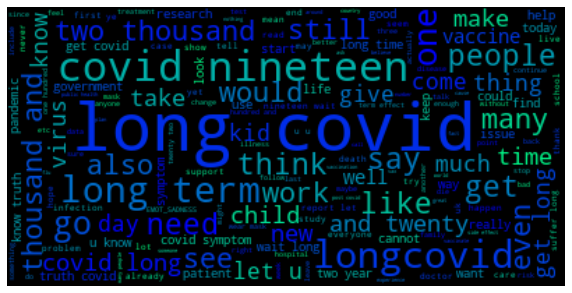

In [32]:
#with replacements and no stemming
plot_wordcloud_from_tweets(preprocessed_tweets)

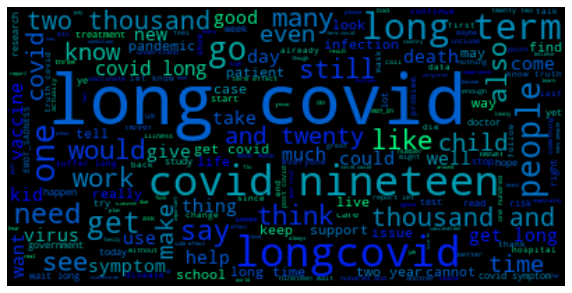

In [166]:
#without stemming 
plot_wordcloud_from_tweets(preprocessed_tweets)

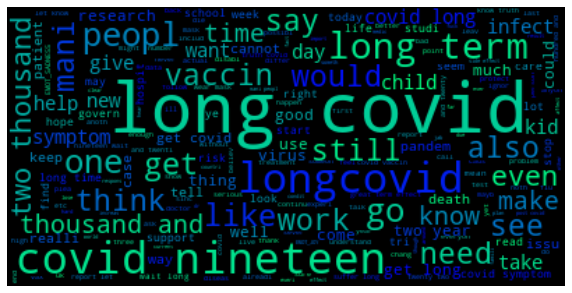

In [33]:
#with stemming
plot_wordcloud_from_tweets(preprocessed_tweets)

#### German tweets discovery (After translation)

In [31]:
translated_german_tweets = translate_tweets(sampled_no_retweet_df[sampled_no_retweet_df['lang']=='de']['full_tweet'])

KeyboardInterrupt: 

In [38]:
import pickle

with open(datapath + 'translated/translated_german_' + filename, 'wb') as f:
  pickle.dump(translated_german_tweets, f)

In [46]:
with open(datapath + 'translated/translated_german_' + filename, 'rb') as f:
  translated_german_tweets = pickle.load(f)

In [42]:
len(translated_german_tweets)

3328

In [95]:
preprocessed_german_tweets = preprocess_tweets(translated_german_tweets)

INFO: No category set for emoji 😉 -> delete emoji :winking_face:
INFO: No category set for emoji 🤡 -> delete emoji :clown_face:
INFO: No category set for emoji ➡ -> delete emoji :right_arrow:
INFO: No category set for emoji 😉 -> delete emoji :winking_face:
INFO: No category set for emoji 🤔 -> delete emoji :thinking_face:
INFO: No category set for emoji ✊ -> delete emoji :raised_fist:
INFO: No category set for emoji 😉 -> delete emoji :winking_face:
INFO: No category set for emoji ‼ -> delete emoji :double_exclamation_mark:
INFO: No category set for emoji 🤡 -> delete emoji :clown_face:
INFO: No category set for emoji 👍 -> delete emoji :thumbs_up:
INFO: No category set for emoji 💪 -> delete emoji :flexed_biceps:
INFO: No category set for emoji 🤔 -> delete emoji :thinking_face:
INFO: No category set for emoji 🙌 -> delete emoji :raising_hands:
INFO: No category set for emoji 🤡 -> delete emoji :clown_face:
INFO: No category set for emoji 🤡 -> delete emoji :clown_face:
INFO: No category set f

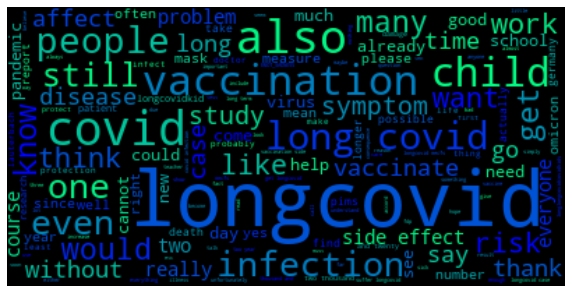

In [58]:
#with replacements and no stemming
plot_wordcloud_from_tweets(preprocessed_german_tweets)

In [ ]:
#without stemming
plot_wordcloud_from_tweets(preprocessed_german_tweets)

In [ ]:
#with stemming
plot_wordcloud_from_tweets(preprocessed_german_tweets)

#### French tweets discovery (After translation)

In [59]:
translated_french_tweets = translate_tweets(sampled_no_retweet_df[sampled_no_retweet_df['lang']=='fr']['full_tweet'])

In [98]:
import pickle

with open(datapath + 'translated/translated_french_' + filename, 'wb') as f:
  pickle.dump(translated_french_tweets, f)
 

In [45]:
with open(datapath + 'translated/translated_french_' + filename, 'rb') as f:
  translated_french_tweets = pickle.load(f)

In [ ]:
preprocessed_french_tweets = preprocess_tweets(translated_french_tweets)

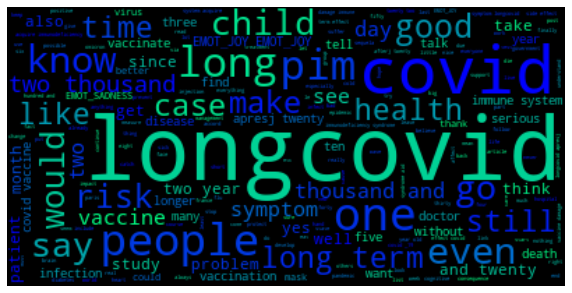

In [86]:
#with replacements and no stemming
plot_wordcloud_from_tweets(preprocessed_french_tweets)

#### Undetermined tweets discovery (After translation)

In [70]:
from deep_translator import single_detection

In [ ]:
lang = [single_detection(x, api_key='258da1680dd99f69a8581230f31d2067') for x in preprocessed_undetermined_tweets if x==x]
print(lang) # output: [fr, en]

In [ ]:
import pickle

with open(home + '/translated_undetermined_tweets.pkl', 'wb') as f:
  pickle.dump(translated_undetermined_tweets, f)
 

In [ ]:
#with open(home + '/translated_german_tweets.pkl', 'rb') as f:
#  mynewlist = pickle.load(f)

In [ ]:
type(translated_undetermined_tweets)

list

In [ ]:
preprocessed_undetermined_tweets = preprocess_tweets(sampled_no_retweet_df[sampled_no_retweet_df['lang']=='und']['full_tweet'])

In [ ]:
preprocessed_undetermined_tweets

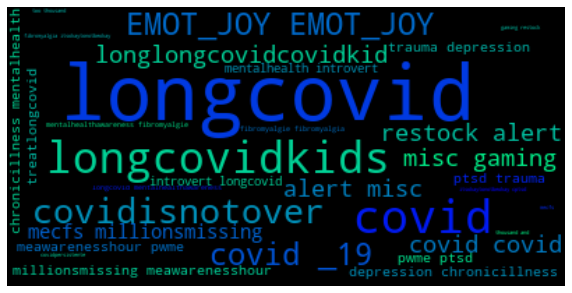

In [79]:
plot_wordcloud_from_tweets(preprocessed_undetermined_tweets)

#### Combined languages tweets discovery (After translation)

In [ ]:
preprocessed_tweets

In [ ]:
en_de_fr_preprocessed_tweets = []
en_de_fr_preprocessed_tweets.extend(preprocessed_tweets)
en_de_fr_preprocessed_tweets.extend(preprocessed_german_tweets)
en_de_fr_preprocessed_tweets.extend(preprocessed_french_tweets)


In [100]:
len(en_de_fr_preprocessed_tweets)

27433

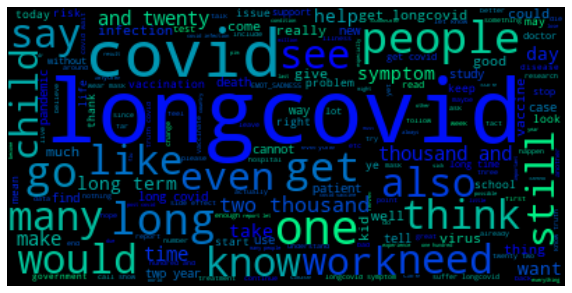

In [101]:
plot_wordcloud_from_tweets(en_de_fr_preprocessed_tweets)

In [2]:
!pip install gensim

  Using cached gensim-4.1.2.tar.gz (23.2 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
Using legacy 'setup.py install' for gensim, since package 'wheel' is not installed.
  Running setup.py install for gensim: started
  Running setup.py install for gensim: finished with status 'done'


In [3]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hayadi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [103]:
stop_words = stopwords.words('english')
stop_words.extend(['and', 'one', 'get', 'go', 'u', 'take', 'one', 'two'])

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]

In [107]:
# remove stop words
data_words = remove_stopwords(en_de_fr_preprocessed_tweets)

In [108]:
import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])


[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 2), (21, 1), (22, 1), (23, 1)]


In [109]:
from pprint import pprint
# number of topics
num_topics = 5
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.043*"longcovid" + 0.035*"covid" + 0.018*"vaccine" + 0.016*"long" + '
  '0.011*"know" + 0.010*"people" + 0.009*"vaccination" + 0.008*"effect" + '
  '0.007*"risk" + 0.007*"twenty"'),
 (1,
  '0.032*"longcovid" + 0.024*"covid" + 0.012*"long" + 0.009*"study" + '
  '0.008*"new" + 0.008*"health" + 0.007*"patient" + 0.005*"syndrome" + '
  '0.004*"well" + 0.004*"post"'),
 (2,
  '0.038*"covid" + 0.033*"longcovid" + 0.025*"long" + 0.009*"people" + '
  '0.007*"time" + 0.007*"child" + 0.007*"mask" + 0.007*"year" + 0.006*"say" + '
  '0.006*"like"'),
 (3,
  '0.051*"longcovid" + 0.023*"covid" + 0.014*"people" + 0.008*"many" + '
  '0.008*"symptom" + 0.006*"infection" + 0.006*"would" + 0.006*"also" + '
  '0.006*"know" + 0.005*"vaccination"'),
 (4,
  '0.049*"longcovid" + 0.009*"day" + 0.009*"twenty" + 0.009*"emot_joy" + '
  '0.008*"pims" + 0.007*"people" + 0.006*"mecfs" + 0.006*"covid" + '
  '0.005*"year" + 0.005*"long"')]
